In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("/content/laptop_.csv")
df.head()

,Unnamed: 0,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,ppi,Cpu brand,HDD,SSD,Gpu brand,os
0,0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,IntelCorei5,0,128,Intel,Mac
1,1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,IntelCorei5,0,0,Intel,Mac
2,2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,IntelCorei5,0,256,Intel,Others/No OS/Linux
3,3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,IntelCorei7,0,512,AMD,Mac
4,4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,IntelCorei5,0,256,Intel,Mac


In [3]:
df.isnull().sum()

Unnamed: 0     0
Company        0
TypeName       0
Ram            0
Weight         0
Price          0
Touchscreen    0
Ips            0
ppi            0
Cpu brand      0
HDD            0
SSD            0
Gpu brand      0
os             0
dtype: int64

In [4]:
df.drop("Unnamed: 0",inplace=True,axis=1)

In [5]:
df.corr()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


In [6]:
df.corr().style.background_gradient()

,Ram,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.095808,0.603379
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.514147,-0.063818
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.096891,0.670660
Touchscreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.208766,0.257577
Ips,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.093588,0.225311
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.294698,0.509437
HDD,0.095808,0.514147,-0.096891,-0.208766,-0.093588,-0.294698,1.000000,-0.400750
SSD,0.603379,-0.063818,0.670660,0.257577,0.225311,0.509437,-0.400750,1.000000


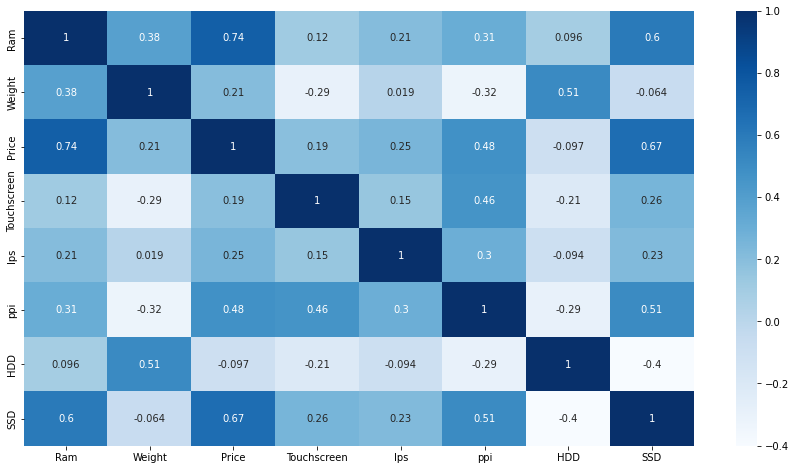

In [7]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues")

In [8]:
df.corr()["Price"].sort_values()

HDD           -0.096891
Touchscreen    0.192917
Weight         0.209867
Ips            0.253320
ppi            0.475368
SSD            0.670660
Ram            0.742905
Price          1.000000
Name: Price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


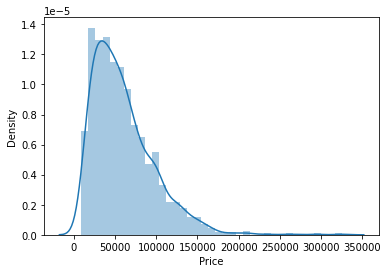

In [9]:
sns.distplot(df["Price"])

[]

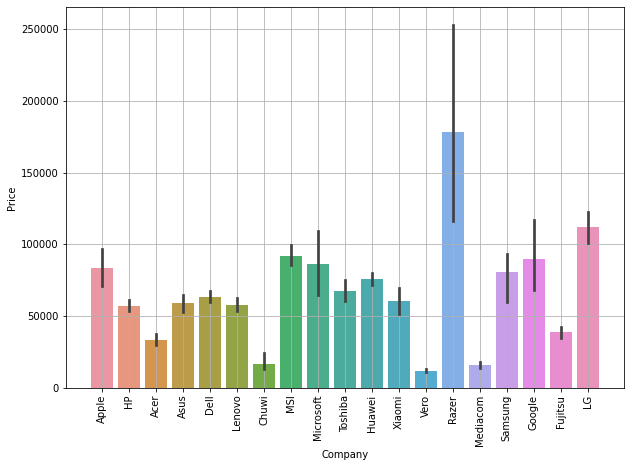

In [10]:
# avreage company  price in laptop
plt.figure(figsize=(10,7))
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.grid(True)
plt.plot()

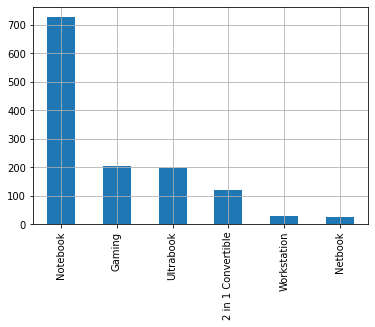

In [11]:
# laptop types name  
df["TypeName"].value_counts().plot(kind="bar")
plt.grid(True)

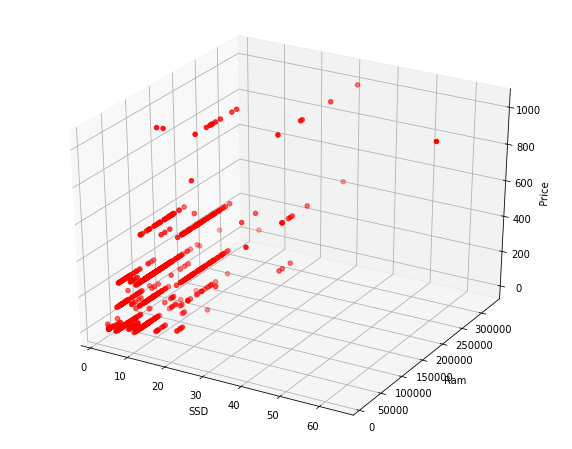

In [52]:

fig = plt.figure(figsize=(10,8))
ax= plt.axes(projection='3d')
ax.set_xlabel('SSD')
ax.set_ylabel('Ram')
ax.set_zlabel('Price')

ax.scatter3D(df['Ram'],df['Price'],df['SSD'],c='red')

[]

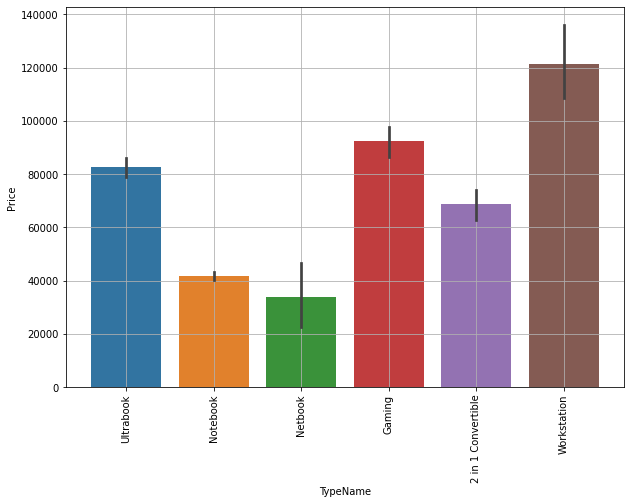

In [12]:
# avreage in type name laptop 
plt.figure(figsize=(10,7))
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation="vertical")
plt.grid(True)
plt.plot()

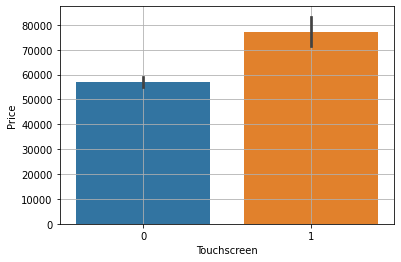

In [13]:
sns.barplot(x=df["Touchscreen"],y=df["Price"]) # Touchscreen laptop price in high camparizan in not Touc
plt.grid(True)

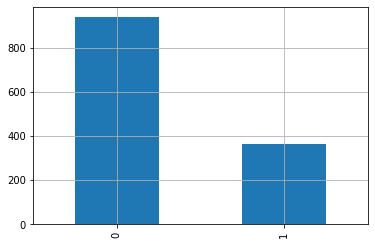

In [14]:
df["Ips"].value_counts().plot(kind="bar")
plt.grid(True)#count the Ips laptop  in more

In [15]:
df.corr()["Price"]

Ram            0.742905
Weight         0.209867
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

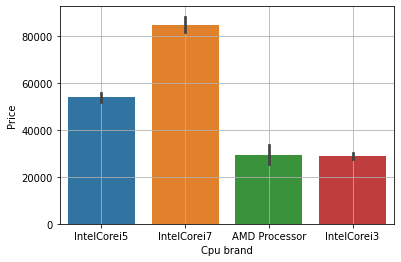

In [16]:
sns.barplot(x=df["Cpu brand"],y=df["Price"])# price processor start price
plt.grid(True)

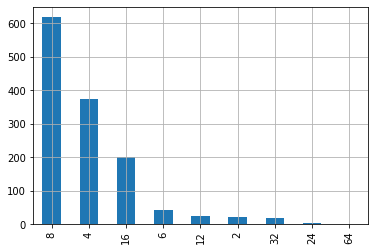

In [17]:
# Ram
df["Ram"].value_counts().plot(kind="bar")
plt.grid(True)

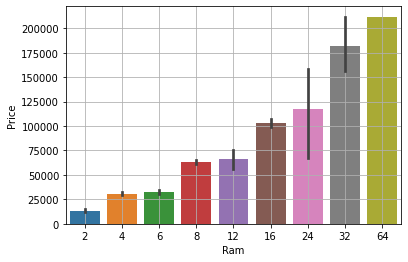

In [18]:
sns.barplot(x=df["Ram"],y=df["Price"])# ram is high price is high lineran rection 
plt.grid(True)

In [19]:
df["Gpu brand"].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

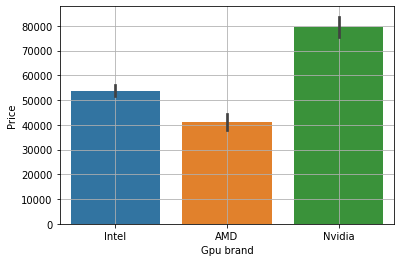

In [20]:
sns.barplot(x=df["Gpu brand"],y=df["Price"])# grafisccard 
plt.grid(True)

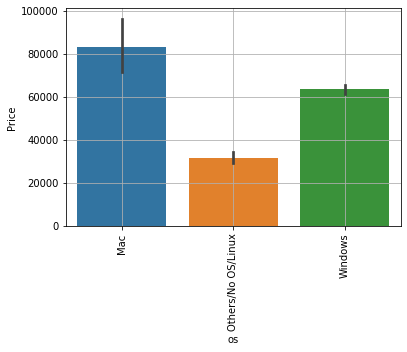

In [21]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.grid(True)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


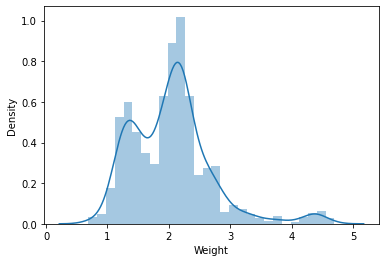

In [22]:
sns.distplot(df['Weight'])

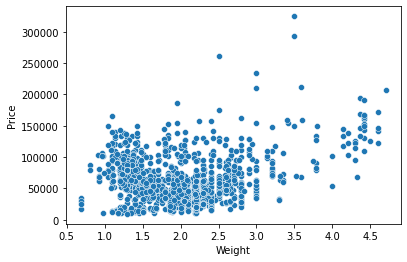

In [23]:
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [24]:
x=df.drop("Price",axis=1)
y=df["Price"]

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
x["Cpu brand"]=le.fit_transform(x["Cpu brand"])
	  	
x["Gpu brand"]=le.fit_transform(x["Gpu brand"])
x["TypeName"]=le.fit_transform(x["TypeName"])
x["Company"]=le.fit_transform(x["Company"])

x["os"]=le.fit_transform(x["os"])

In [26]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.15,random_state=1)

In [27]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
xtrain= sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

In [28]:
import tensorflow as tf

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [29]:
model = Sequential()

model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')
model.fit(xtrain,ytrain,epochs=550,validation_data=(xtest,ytest))

Epoch 1/550
35/35 [==============================] - 1s 7ms/step - loss: 4814862848.0000 - val_loss: 5866706944.0000
Epoch 2/550
35/35 [==============================] - 0s 3ms/step - loss: 4814499840.0000 - val_loss: 5865801728.0000
Epoch 3/550
35/35 [==============================] - 0s 3ms/step - loss: 4812518400.0000 - val_loss: 5860964864.0000
Epoch 4/550
35/35 [==============================] - 0s 4ms/step - loss: 4803475456.0000 - val_loss: 5840957952.0000
Epoch 5/550
35/35 [==============================] - 0s 2ms/step - loss: 4771061248.0000 - val_loss: 5773413376.0000
Epoch 6/550
35/35 [==============================] - 0s 2ms/step - loss: 4677111296.0000 - val_loss: 5590675968.0000
Epoch 7/550
35/35 [==============================] - 0s 2ms/step - loss: 4444281344.0000 - val_loss: 5183349248.0000
Epoch 8/550
35/35 [==============================] - 0s 2ms/step - loss: 3976526592.0000 - val_loss: 4432361472.0000
Epoch 9/550
35/35 [==============================] - 0s 2ms/step

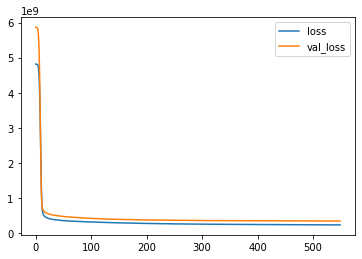

In [30]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [31]:
from tensorflow.keras.callbacks  import EarlyStopping

model = Sequential()

model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(units=10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [32]:
earlystop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=25)

In [33]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
35/35 [==============================] - 1s 6ms/step - loss: 4814915072.0000 - val_loss: 5866846720.0000
Epoch 2/600
35/35 [==============================] - 0s 3ms/step - loss: 4814848512.0000 - val_loss: 5866742784.0000
Epoch 3/600
35/35 [==============================] - 0s 2ms/step - loss: 4814701056.0000 - val_loss: 5866454528.0000
Epoch 4/600
35/35 [==============================] - 0s 3ms/step - loss: 4814233088.0000 - val_loss: 5865464832.0000
Epoch 5/600
35/35 [==============================] - 0s 2ms/step - loss: 4812656128.0000 - val_loss: 5862162432.0000
Epoch 6/600
35/35 [==============================] - 0s 2ms/step - loss: 4807715328.0000 - val_loss: 5852578304.0000
Epoch 7/600
35/35 [==============================] - 0s 3ms/step - loss: 4795126784.0000 - val_loss: 5829468160.0000
Epoch 8/600
35/35 [==============================] - 0s 3ms/step - loss: 4767475712.0000 - val_loss: 5781824512.0000
Epoch 9/600
35/35 [==============================] - 0s 3ms/step

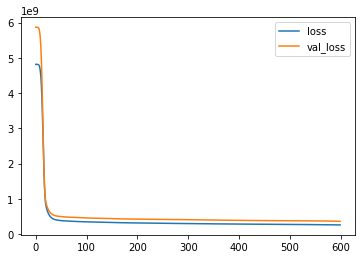

In [34]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [35]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(units=19,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [36]:
model.fit(xtrain,ytrain,epochs=600,validation_data=(xtest,ytest),callbacks=[earlystop])

Epoch 1/600
35/35 [==============================] - 1s 6ms/step - loss: 4814907392.0000 - val_loss: 5866812928.0000
Epoch 2/600
35/35 [==============================] - 0s 2ms/step - loss: 4814743552.0000 - val_loss: 5866379264.0000
Epoch 3/600
35/35 [==============================] - 0s 3ms/step - loss: 4813650432.0000 - val_loss: 5863486976.0000
Epoch 4/600
35/35 [==============================] - 0s 3ms/step - loss: 4807585792.0000 - val_loss: 5848168960.0000
Epoch 5/600
35/35 [==============================] - 0s 3ms/step - loss: 4781637632.0000 - val_loss: 5790260736.0000
Epoch 6/600
35/35 [==============================] - 0s 3ms/step - loss: 4696482816.0000 - val_loss: 5620753920.0000
Epoch 7/600
35/35 [==============================] - 0s 2ms/step - loss: 4475290624.0000 - val_loss: 5213099008.0000
Epoch 8/600
35/35 [==============================] - 0s 3ms/step - loss: 4010764288.0000 - val_loss: 4449081344.0000
Epoch 9/600
35/35 [==============================] - 0s 2ms/step

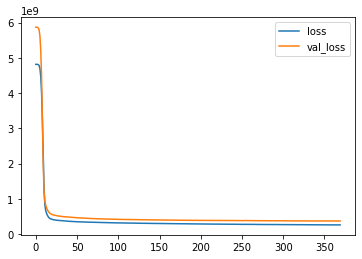

In [37]:
loss=pd.DataFrame(model.history.history)
loss.plot()

In [38]:
model.evaluate(xtest,ytest)

7/7 [==============================] - 0s 2ms/step - loss: 370297504.0000


370297504.0

In [39]:
model.evaluate(xtrain,ytrain)

35/35 [==============================] - 0s 1ms/step - loss: 257290752.0000


257290752.0

In [40]:
ypred=model.predict(xtest)

In [41]:
dic={"Actual Y ":ytest,"Predicted Y":ypred.flatten()}
df1=pd.DataFrame(dic)

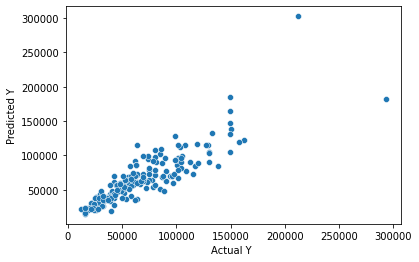

In [42]:
sns.scatterplot(x="Actual Y ",y="Predicted Y",data=df1)
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
print(f"MSE:{mean_squared_error(ytest,ypred)}")
print(f"RMSE:{np.sqrt(mean_squared_error(ytest,ypred))}")
print(f"R2_score:{r2_score(ytest,ypred)}")
print(f"Accuracy : {r2_score(ytest,ypred)}")

MSE:370297496.9296123
RMSE:19243.115572318642
R2_score:0.7673358954624718
Accuracy : 0.7673358954624718


In [45]:
#Step1: import the model (class) from the package
from sklearn.linear_model import LinearRegression

#Step2: create an object for the linearRegression
linreg = LinearRegression()

#Step3: train the data (find the value of m and c) using fit method
linreg.fit(xtrain,ytrain)

#Step4 : Use predict
y_pred = linreg.predict(xtest)

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
print(f'MSE: {mean_squared_error(ytest,y_pred)}')
print(f'RMSE: {np.sqrt(mean_squared_error(ytest,y_pred))}')
print(f'Accuracy: {r2_score(ytest,y_pred)}')

MSE: 469765619.140392
RMSE: 21674.07712315318
Accuracy: 0.7048384122872087


In [47]:
from tensorflow.keras.models import load_model
model.save("laptop_price")

INFO:tensorflow:Assets written to: laptop_price/assets
